In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('smsspamcollection.tsv',sep = '\t')

In [95]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [96]:
len(df)

5572

total number of entries in the dataset is 5572

# CHecking for missing values

In [97]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [98]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [99]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

There are 4825 ham messages out of a total 5527, which is approximately 87.3% . This means that any machine learning model we create has to perform better than 86.6% in order to beat random chance.

# Visualization of data

In [100]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.

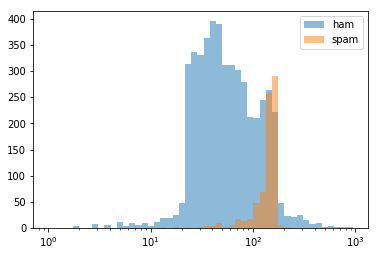

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.5)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.5)
plt.legend(('ham','spam'))
plt.show()

There's a small range of values where a message is more likely to be spam than ham.

In [102]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

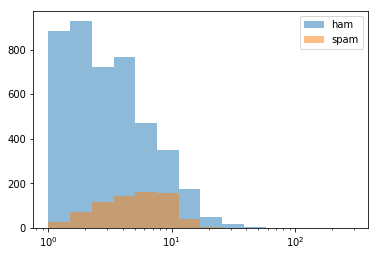

In [103]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.5)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.5)
plt.legend(('ham','spam'))
plt.show()

This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.

# First we will perform classification the length and punctuation columns

In [104]:
X = df[['length','punct']]
y = df['label']

Train Test Split

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)

print("the precision, recall and f1 score is \n")
print(metrics.classification_report(y_test,predictions))
print("the accuracy is \n")
print(metrics.accuracy_score(y_test,predictions))

the precision, recall and f1 score is 

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

   micro avg       0.84      0.84      0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839

the accuracy is 

0.843936922240348


Logistic Regression performed worse than a classifier that assigned all messages as "ham" would have.

Naive Bayes

In [107]:
from sklearn.naive_bayes import MultinomialNB


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print("the precision, recall and f1 score is \n")
print(metrics.classification_report(y_test,predictions))
print("the accuracy is \n")
print(metrics.accuracy_score(y_test,predictions))

the precision, recall and f1 score is 

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

   micro avg       0.86      0.86      0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839

the accuracy is 

0.8607939097335509


<font color=green>Better, but still less accurate than 86.6%</font>

SVM

In [108]:
from sklearn.svm import SVC


svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

predictions = svc_model.predict(X_test)

print("the precision, recall and f1 score is \n")
print(metrics.classification_report(y_test,predictions))
print("the accuracy is \n")
print(metrics.accuracy_score(y_test,predictions))

the precision, recall and f1 score is 

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

   micro avg       0.89      0.89      0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839

the accuracy is 

0.8863512778684067


SVC performs slightly better than random chance.

Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

predictions = dec_tree.predict(X_test)

print("the precision, recall and f1 score is \n")
print(metrics.classification_report(y_test,predictions))
print("the accuracy is \n")
print(metrics.accuracy_score(y_test,predictions))

the precision, recall and f1 score is 

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1593
        spam       0.56      0.44      0.49       246

   micro avg       0.88      0.88      0.88      1839
   macro avg       0.74      0.69      0.71      1839
weighted avg       0.87      0.88      0.87      1839

the accuracy is 

0.878194671016857


Decision Tree also performs better than random guessing but SVC is better.

Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

print("the precision, recall and f1 score is \n")
print(metrics.classification_report(y_test,predictions))
print("the accuracy is \n")
print(metrics.accuracy_score(y_test,predictions))

the precision, recall and f1 score is 

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1593
        spam       0.59      0.48      0.53       246

   micro avg       0.89      0.89      0.89      1839
   macro avg       0.75      0.72      0.73      1839
weighted avg       0.88      0.89      0.88      1839

the accuracy is 

0.8852637302882002
